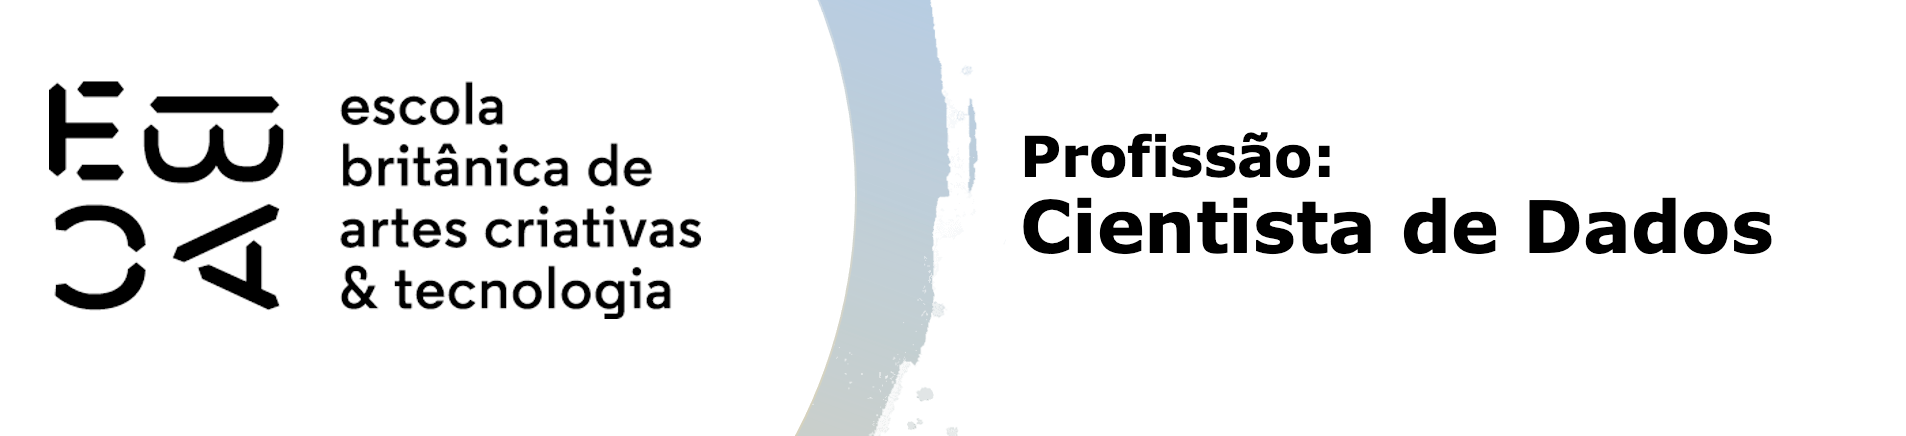

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA

from tqdm.notebook import tqdm


In [3]:
df = pd.read_csv('online_shoppers_intention.csv')

In [4]:
df.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
6320,4,118.800000,0,0.0,11,805.500000,0.000000,0.033333,0.000000,0.0,Oct,1,1,9,3,Returning_Visitor,False,False
11074,0,0.000000,0,0.0,22,849.833333,0.000000,0.021212,0.000000,0.0,Nov,2,2,1,3,Returning_Visitor,False,False
2352,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.6,May,3,2,1,13,Returning_Visitor,False,False
11561,5,262.121212,1,0.0,117,7468.860173,0.012900,0.020948,3.014026,0.0,Nov,3,2,1,2,Returning_Visitor,False,False
9631,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Nov,3,2,7,20,Returning_Visitor,False,False
8164,0,0.000000,0,0.0,17,1059.575000,0.000000,0.011765,62.762948,0.0,Nov,2,2,1,2,New_Visitor,False,True
4193,7,1474.500000,2,11.5,129,5293.824709,0.005072,0.020659,2.524994,0.2,May,2,2,3,1,Returning_Visitor,False,False
10127,2,47.500000,0,0.0,50,1870.791667,0.002642,0.024025,0.000000,0.0,Dec,2,2,6,1,Returning_Visitor,False,False
3246,4,191.000000,0,0.0,45,2171.174592,0.000000,0.017931,0.000000,0.4,May,2,4,7,6,Returning_Visitor,False,False
12052,4,323.500000,0,0.0,10,320.750000,0.000000,0.015385,0.000000,0.0,Nov,2,2,6,2,New_Visitor,False,False


In [5]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

#### Seleção das variáveis do escopo:

In [6]:
df_select = df.iloc[:, :6]
df_select.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
6011,6,130.500000,2,439.200000,78,5526.080123
468,0,0.000000,0,0.000000,2,0.000000
11029,4,47.833333,0,0.000000,69,2499.990079
8742,0,0.000000,0,0.000000,1,0.000000
1441,2,45.000000,0,0.000000,26,535.345960
6297,9,178.520000,3,183.266667,7,205.856667
6246,0,0.000000,1,0.000000,17,982.757619
10140,1,21.000000,0,0.000000,31,1998.250000
4576,8,178.166667,1,17.000000,52,3095.975000
10336,0,0.000000,0,0.000000,3,408.000000


In [7]:
df_select.shape

(12330, 6)

##### Função para avaliar a distribuição das variáveis selecionadas:

In [8]:
def distribuicao (df: pd.DataFrame, var: str, limite_discretas=40):
    '''
    Recebe um DataFrame e uma variável numérica e devolve o gráfico com o boxplot e a distribuição dessa variável
    '''
    unicos = df[var].nunique()
    if pd.api.types.is_integer_dtype(df[var]) and unicos <= limite_discretas:
        tipo = 'discreta'
    else:
        tipo = 'contínua'
    
    fig = plt.figure(figsize=(10, 6))

    if tipo == 'contínua':       
        gs = fig.add_gridspec(2, 1, height_ratios=(1, 4), hspace=0.05)

        ax_box = fig.add_subplot(gs[0])
        ax_hist = fig.add_subplot(gs[1], sharex=ax_box)

        sns.boxplot(x=df[var], ax=ax_box, color= sns.color_palette('crest')[3])
        ax_box.set(title=f'Distribuição da variável contínua: {var}')
        ax_box.set_ylabel('BoxPlot', rotation=0, labelpad=20)
        ax_box.grid(True, linestyle='--', alpha=0.3)

        sns.histplot(df[var], bins=30, ax=ax_hist, color=sns.color_palette('crest')[3])
        ax_hist.set(ylabel='Contagem')
        ax_hist.grid(True, linestyle='--', alpha=0.3)

        ax_box.tick_params(axis='x', labelbottom=True)
        
    else:
        gs = fig.add_gridspec(2, 1, height_ratios=(1, 4), hspace=0.05)

        ax_box = fig.add_subplot(gs[0])
        ax_count = fig.add_subplot(gs[1], sharex=ax_box)

        sns.boxplot(x=df[var], ax=ax_box, color= sns.color_palette('crest')[0])
        ax_box.set(title=f'Distribuição da variável discreta: {var}')
        ax_box.set_ylabel('BoxPlot', rotation=0, labelpad=20)
        ax_box.grid(True, linestyle='--', alpha=0.3)


        sns.countplot(x=df[var], ax=ax_count, color= sns.color_palette('crest')[0], edgecolor='black')
        ax_count.set(ylabel='Contagem')
        ax_count.grid(True, linestyle='--', alpha=0.3)


        ax_box.tick_params(axis='x', labelbottom=True)
        
    plt.show()

##### Distribuição das variáveis:

A função separa as variáveis númericas em discretas e contínuas. Aquelas com mais de 40 valores únicos são tratadas como contínuas com o gráfico em azul e as discretas com o gráfico em verde.

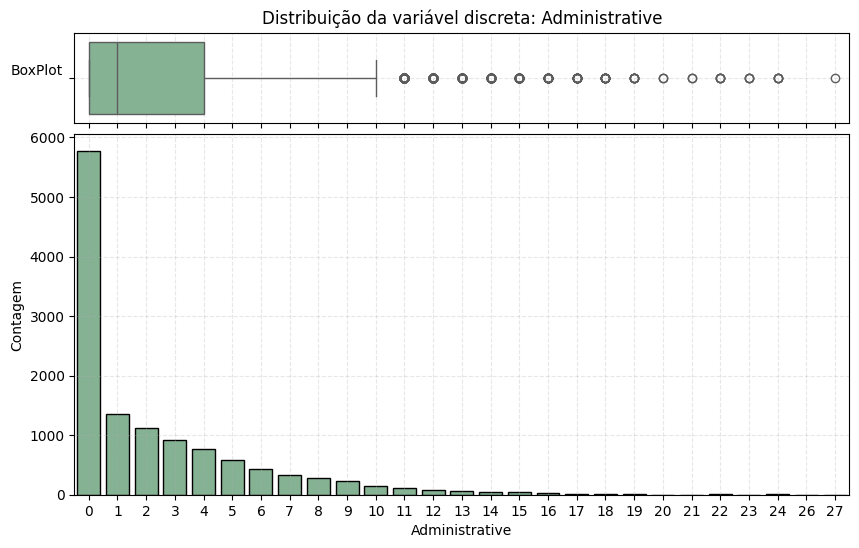

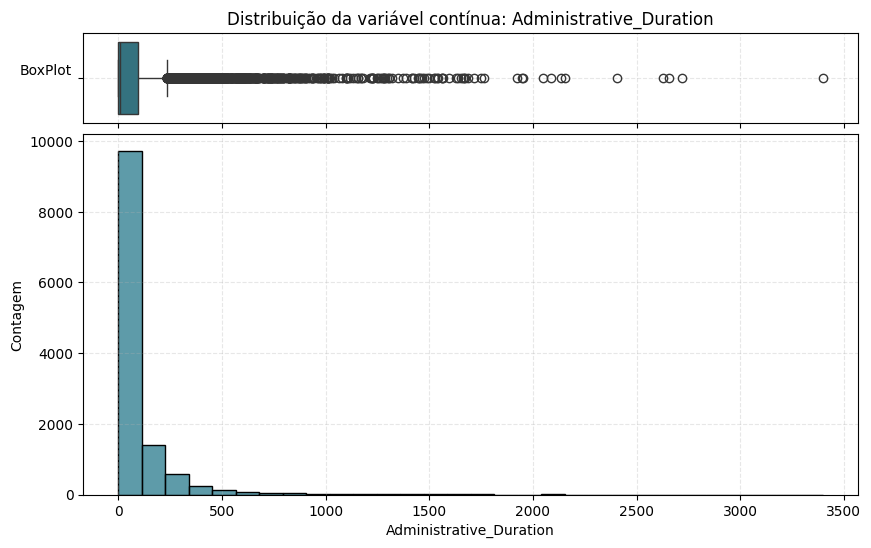

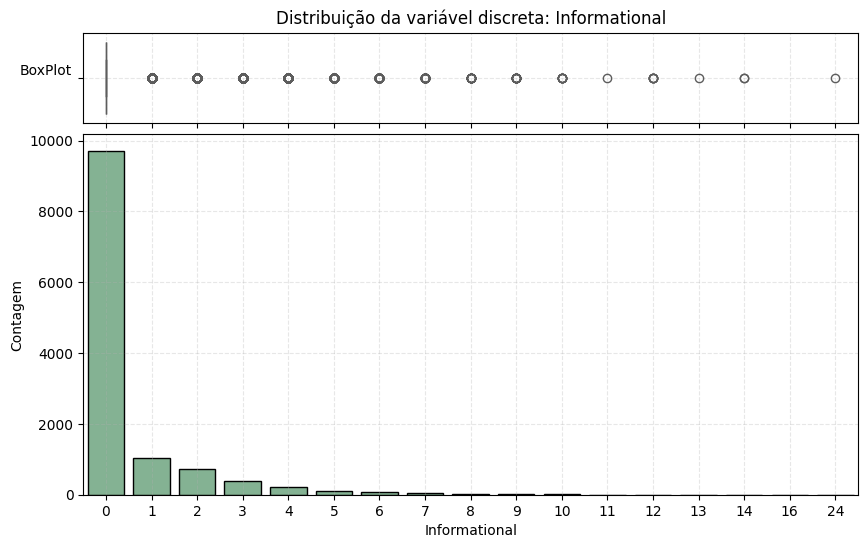

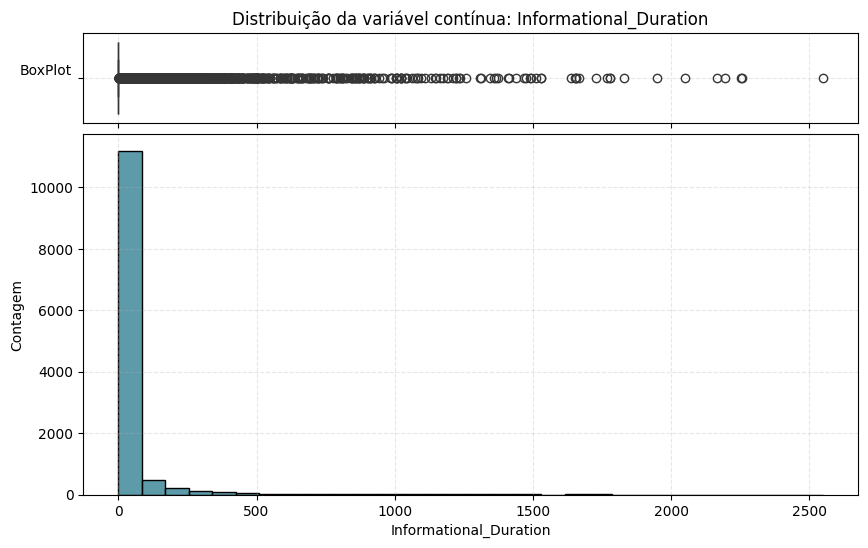

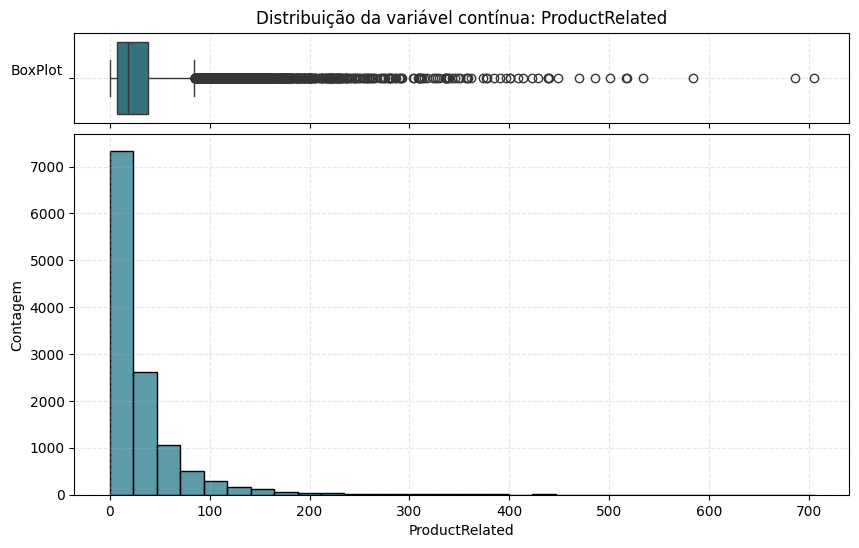

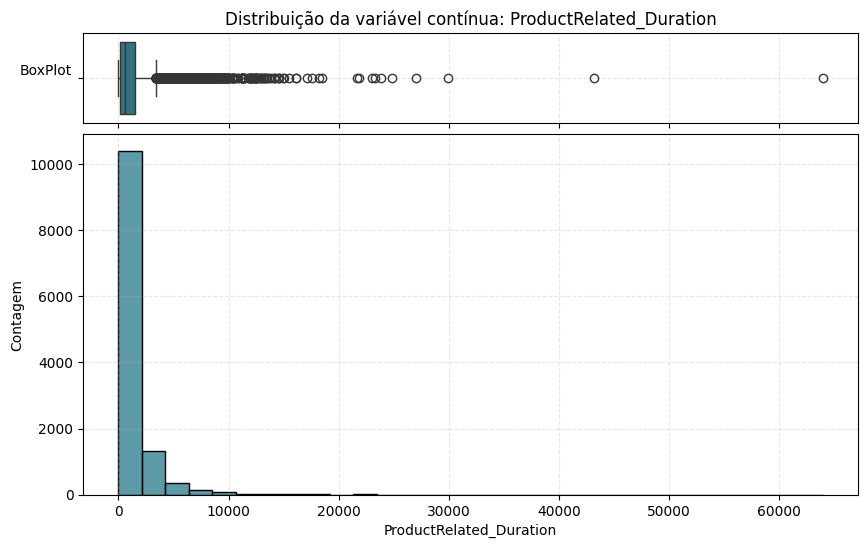

In [9]:
variaveis = df_select.columns.to_list()

for var in variaveis:
    
    distribuicao(df_select, var)

Todas as variáveis selecionadas apresentam características de decrescimento logarítmico, como sua distribuição não é normalizada isso atrapalha modelos de machine learning a identificar padrões. Portando para que os dados se encontrem normalizados, é válida a transofrmação logarítmica. 

Dentre as transformações possíveis de serem aplicadas as com o melhor potêncial de melhora da distribuição das variáveis, dada suas características de distribuição, são a transformação logarítmica e a transformação de Yeo Johnson.

Portanto, vamos avaliar ambas as tranformações para cada variável.

##### Análise de possíveis valores nulos:

In [10]:
df_select.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
dtype: int64

##### Análise de qual transformação melhora os dados com maior eficiência:

Será comparada a tranformação de `yeo-johnson` com `log1p`.

In [11]:
pt = PowerTransformer(method='yeo-johnson')
yeo = df_select.copy()
yeo[variaveis] = pt.fit_transform(yeo[variaveis])

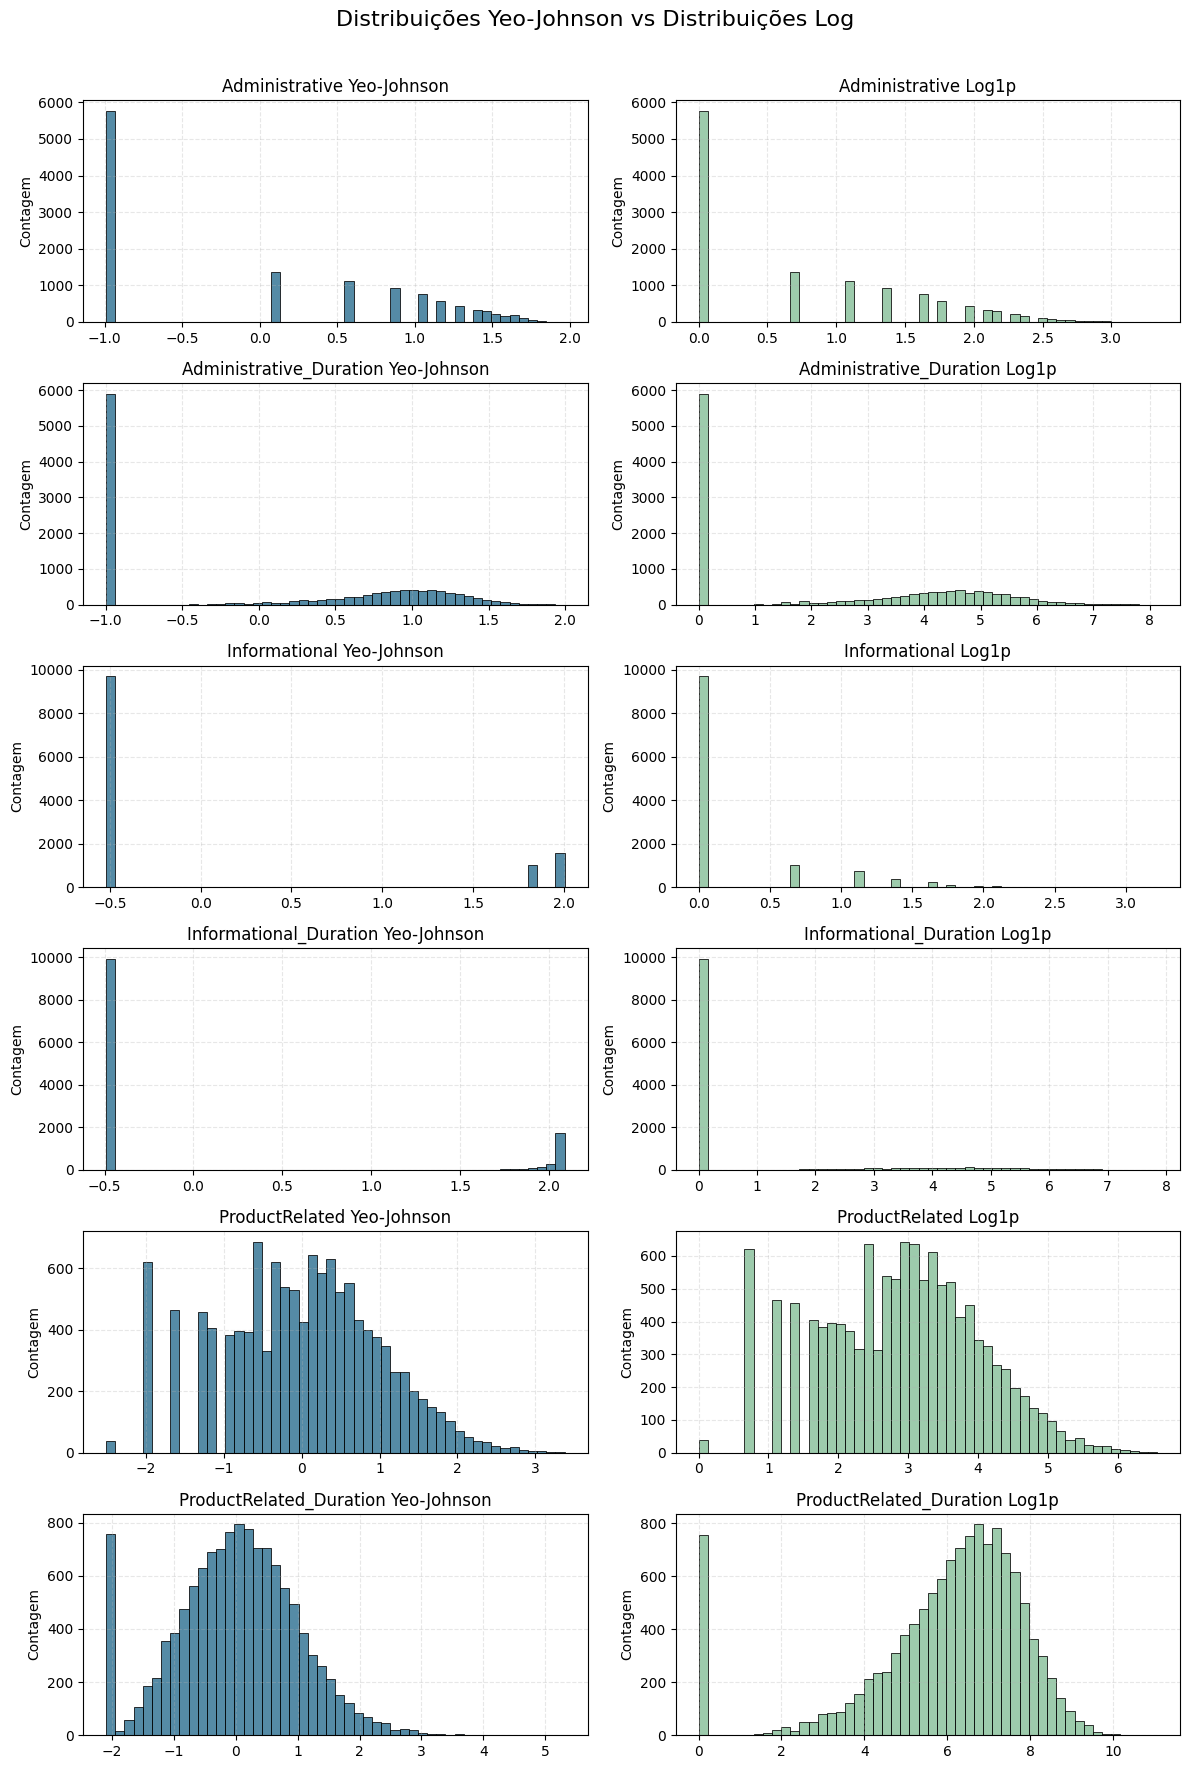

In [12]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12, 18))
fig.suptitle('Distribuições Yeo-Johnson vs Distribuições Log', fontsize=16)


for i, var in enumerate(variaveis):
    
    sns.histplot(yeo[var], bins=50, ax=axes[i, 0], color= sns.color_palette('crest')[4])
    axes[i, 0].set(title= f'{var} Yeo-Johnson', xlabel='', ylabel='Contagem')
    axes[i, 0].grid(True, linestyle='--', alpha=0.3)
    
    sns.histplot(np.log1p(df[var]), bins=50, ax=axes[i, 1], color= sns.color_palette('crest')[0])
    axes[i, 1].set(title= f'{var} Log1p', xlabel='', ylabel='Contagem')
    axes[i, 1].grid(True, linestyle='--', alpha=0.3)


plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

A partir da distribuição acima feita com histogramas ambas as tranformações aparentaram desempenhar de forma semelhante. Portanto para uma decisão final vamos comparar a distribuição com boxplot para entender melhor, pois com ele podemos visualizar melhor a variábilidade, assímetria e outliers.

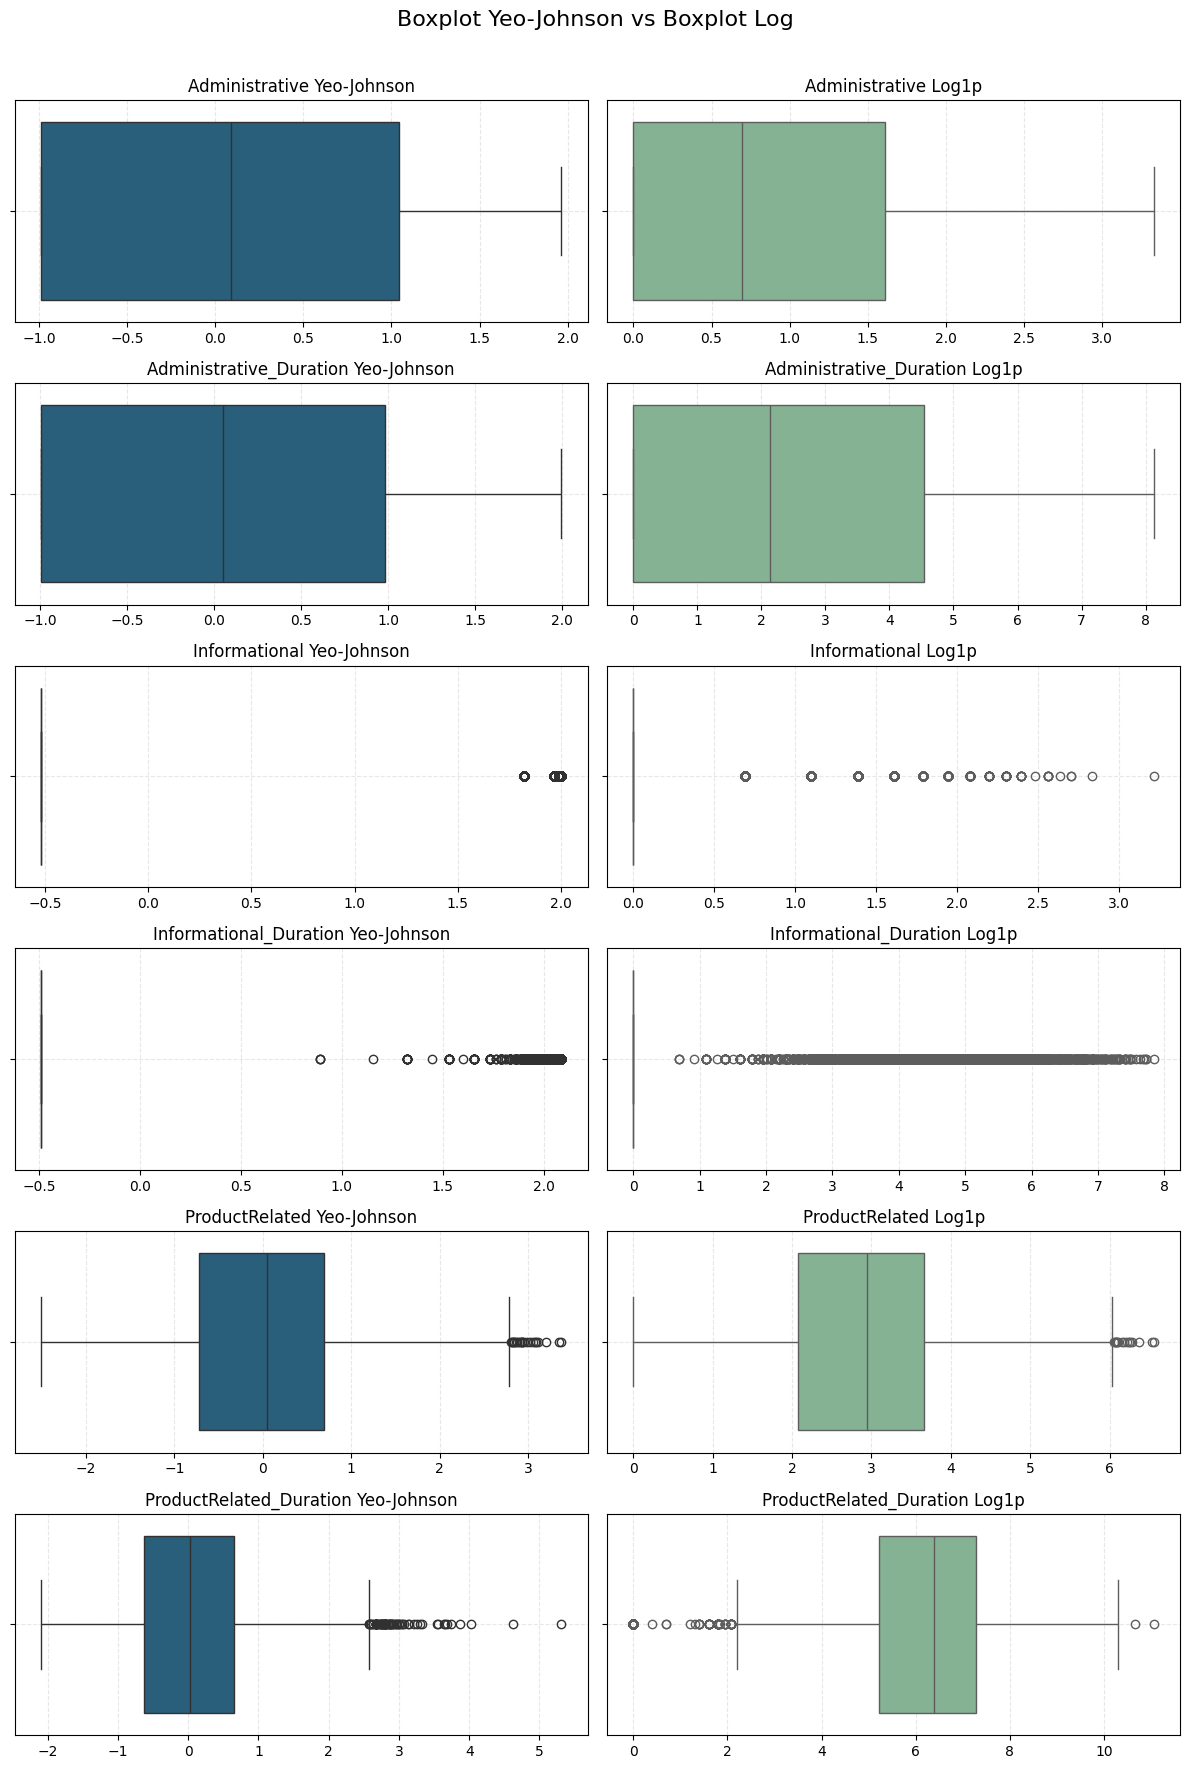

In [13]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12, 18))
fig.suptitle('Boxplot Yeo-Johnson vs Boxplot Log', fontsize=16)

for i, var in enumerate(variaveis):
   
    sns.boxplot(x=yeo[var], ax=axes[i, 0], color= sns.color_palette('crest')[4])
    axes[i, 0].set(title= f'{var} Yeo-Johnson', xlabel='')
    axes[i, 0].grid(True, linestyle='--', alpha=0.3)
    
    sns.boxplot(x=np.log1p(df[var]), ax=axes[i, 1], color= sns.color_palette('crest')[0])
    axes[i, 1].set(title= f'{var} Log1p', xlabel='')
    axes[i, 1].grid(True, linestyle='--', alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

A partir da análise do boxplot de cada variável é possível constatar que a transformação de `yeo-johnson` desempenhou melhor que `log1p` nos aspectos de simetria, variabilidade e outliers dos dados.

Portanto o tratamento utilizado para as variáveis será o `yeo-johnson`.

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

Padronização dos dados com `StandardScaler`:

In [14]:
df_pad = pd.DataFrame(StandardScaler().fit_transform(yeo), columns = yeo.columns)

In [15]:
SQD = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_pad[variaveis])
    SQD.append(km.inertia_)

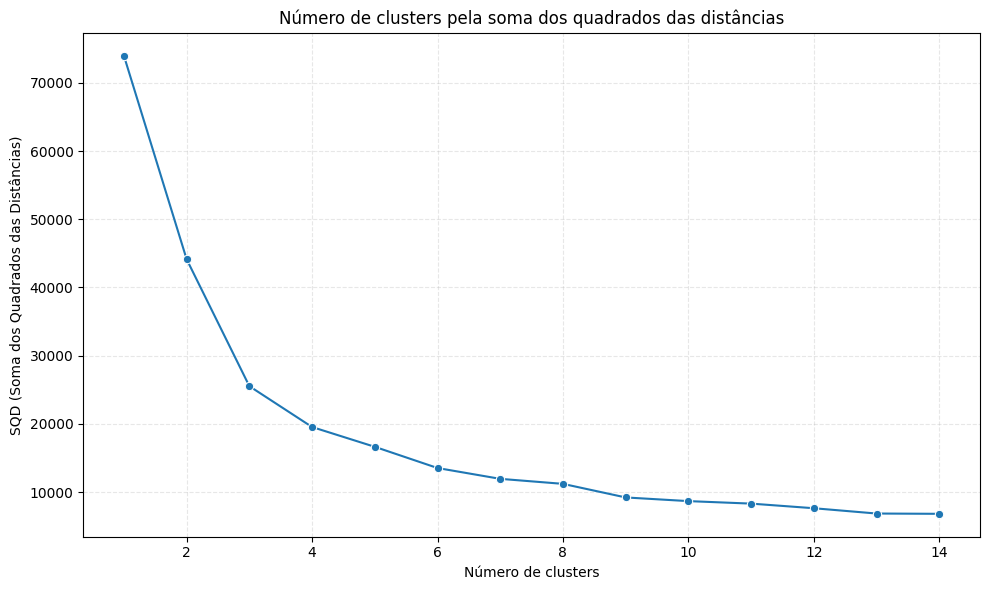

In [16]:
df_plot = pd.DataFrame({'num_clusters': list(range(1, len(SQD)+1)), 'SQD': SQD})
plt.figure(figsize=(10,6))
ax = sns.lineplot(df_plot, x= 'num_clusters', y='SQD', marker='o')
ax.set(title='Número de clusters pela soma dos quadrados das distâncias', xlabel='Número de clusters', ylabel='SQD (Soma dos Quadrados das Distâncias)')
ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

A partir do método do cotovelo é possível constatar que o número de clusters que gera a queda mais brusca no SQD é 3.

Como o método do cotovelo é subjetivo, para uma avaliação mais objetiva vamos utilizar o coeficiente de silhueta:

In [17]:
silhuetas = []
max_clusters = 15

dados_cluster = df_pad.copy()

for n_clusters in tqdm(range(2, max_clusters + 1)):

    km = KMeans(n_clusters=n_clusters, random_state=42).fit(dados_cluster)

    silhuetas.append(silhouette_score(dados_cluster, km.labels_))
    
    df_pad[f'grupos_{n_clusters}'] = pd.Categorical(['grupo_' + str(g) for g in km.labels_])

  0%|          | 0/14 [00:00<?, ?it/s]

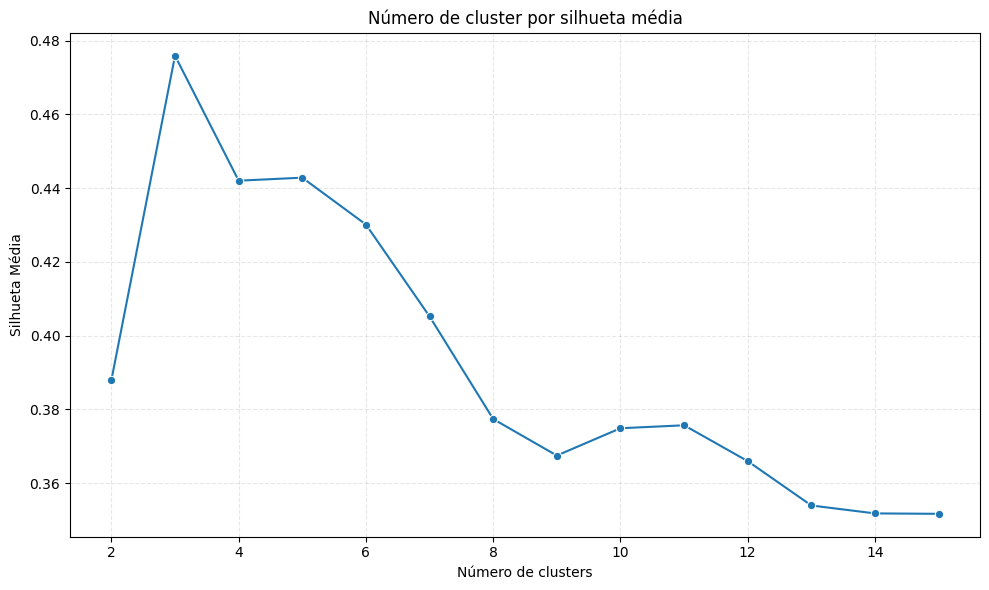

In [18]:
df_silhueta = pd.DataFrame({'n_clusters': list(range(2, max_clusters+1)), 'silhueta_media': silhuetas})

plt.figure(figsize=(10,6))

ax = sns.lineplot(df_silhueta, x = 'n_clusters', y = 'silhueta_media', marker='o')
ax.set(title='Número de cluster por silhueta média', xlabel='Número de clusters', ylabel='Silhueta Média')
ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Como é possível observar acima o número de clusters que aumenta o valor de silhueta média é 3, com o grupo de 4 clusters ficando em segundo lugar.

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

Função para avaliar os agrupamentos criados:

In [19]:
def biplot(score,coeff, y, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 2/(xs.max() - xs.min())
    scaley = 2/(ys.max() - ys.min())
    
    fig, ax = plt.subplots(figsize=(10, 10))
#     scatter = ax.scatter(xs * scalex,ys * scaley, c = y)
    sns.kdeplot(x = xs * scalex, y = ys * scaley, hue=y, ax=ax, fill=True, alpha=.6, palette='crest')
#     ax.legend(*scatter.legend_elements())
    
    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5, 
                 length_includes_head=True, head_width=0.04, head_length=0.04)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'k', ha = 'center', va = 'center')
    ax.set_xlim(-1.2,1.2)
    ax.set_ylim(-1.2,1.2)
    ax.set_xlabel("PC{0}, {1:.1%} da variância explicada".format(1, pca.explained_variance_ratio_[0]))
    ax.set_ylabel("PC{0}, {1:.1%} da variância explicada".format(1, pca.explained_variance_ratio_[1]))
    ax.grid()

In [20]:
pca = PCA(n_components=2)
dados_pca = pca.fit_transform(df_pad[variaveis])

##### Agrupamento com 4 grupos:

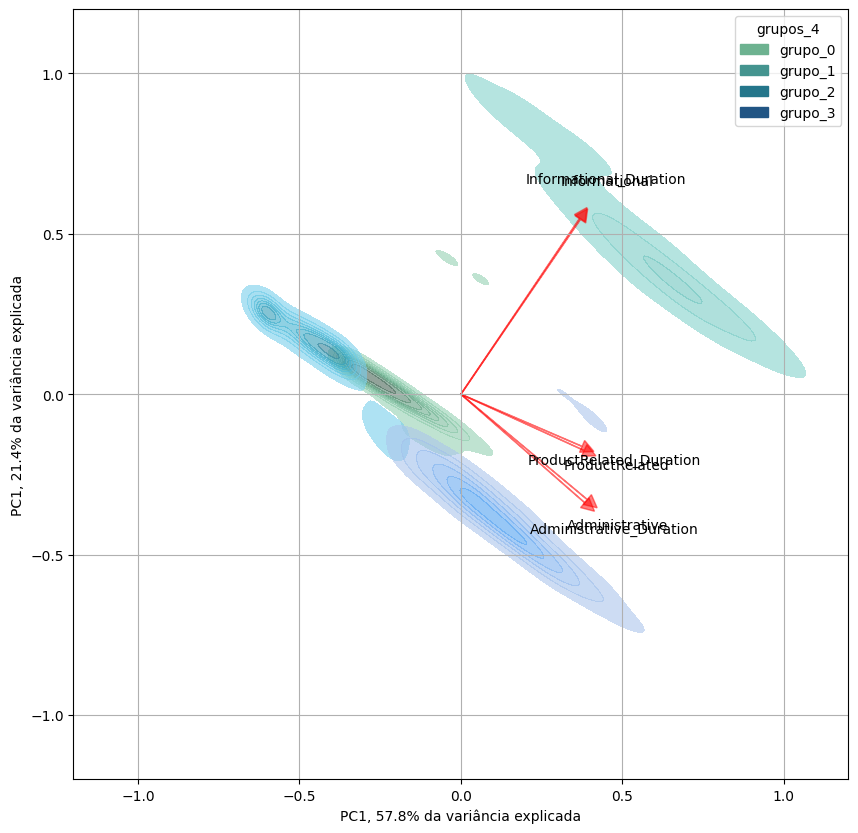

In [21]:
biplot(dados_pca,
       np.transpose(pca.components_[0:2, :]), 
       df_pad['grupos_4'],
       labels = df_pad.columns.to_list())
plt.show()

O agrupamento com 4 grupos não parece diferenciar muito bem os grupos 0 e 2.

##### Agrupamento com 3 grupos:

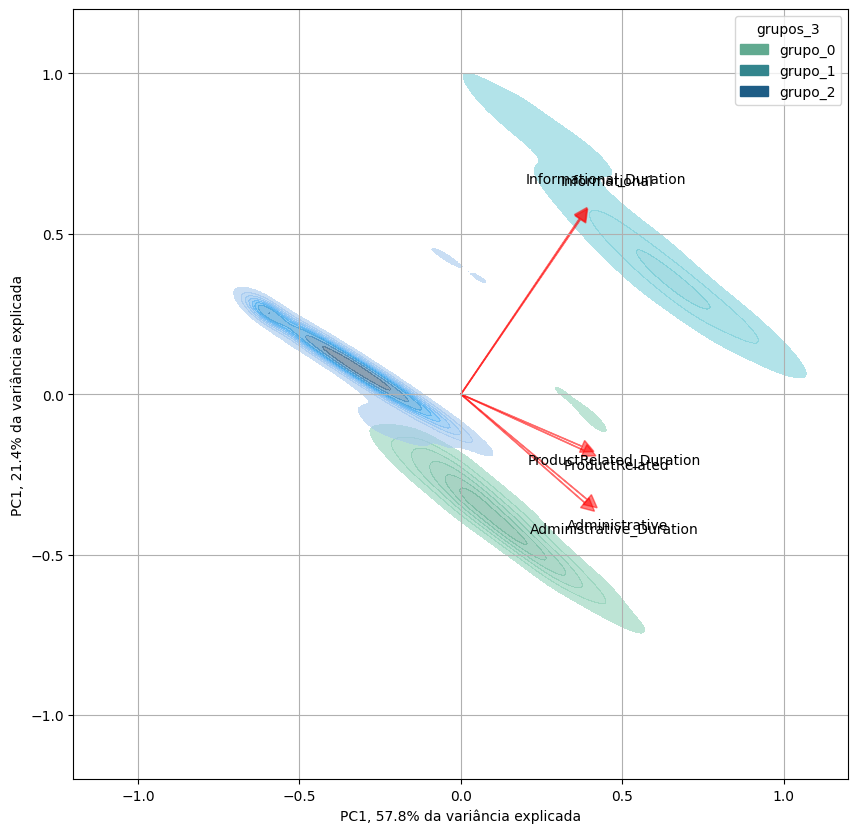

In [22]:
biplot(dados_pca,
       np.transpose(pca.components_[0:2, :]), 
       df_pad['grupos_3'],
       labels = df_pad.columns.to_list())
plt.show()

O agrupamento com 3 grupos separa melhor os grupos, podendo distinguir melhor o grupo que navega mais por páginas informativas, dos demais grupos. Com um pouco menos de distinção entre os grupos que navegam por paginas administrativas dos que navegam por páginas dos produtos, mas ainda sim com distinção o suficiente para termos 3 grupos.

Portanto o número final de clusters a ser utilizados é 3.

Os grupos serão renomeados conforme a distribuição do gráfico acima:

- grupo_0 = Administrativo
- grupo_1 = Informativo
- grupo_2 = Produtos

In [23]:
var_final = variaveis + ['grupos_3']

df_final = df_pad[var_final].copy()
df_final['grupos_3'] = df_final['grupos_3'].astype(str)
df_final.loc[df_final['grupos_3'] == 'grupo_0', 'grupos_3'] = 'Administrativo'
df_final.loc[df_final['grupos_3'] == 'grupo_1', 'grupos_3'] = 'Informativo'
df_final.loc[df_final['grupos_3'] == 'grupo_2', 'grupos_3'] = 'Produtos'

df_final.sample(15)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,grupos_3
9760,-0.990128,-0.996659,-0.520489,-0.491697,-0.229447,-0.418316,Produtos
12170,0.566915,1.042404,1.997635,2.083105,1.268982,0.971621,Informativo
3739,-0.990128,-0.996659,-0.520489,-0.491697,-0.168286,-0.465386,Produtos
11408,1.564949,1.310986,1.823038,2.059675,1.735707,1.379012,Informativo
236,0.848665,1.060972,-0.520489,-0.491697,0.450611,0.664290,Administrativo
2167,0.091737,0.933806,-0.520489,-0.491697,-0.295054,-0.779935,Administrativo
5550,1.040186,1.546052,-0.520489,-0.491697,0.450611,0.715620,Administrativo
7019,-0.990128,-0.996659,-0.520489,-0.491697,-0.722611,-1.164885,Produtos
1002,0.566915,1.073185,-0.520489,-0.491697,-0.168286,-0.495001,Administrativo
382,0.091737,0.367645,-0.520489,-0.491697,0.212414,-0.215857,Administrativo


## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

Adicionando a variável dos grupos encontrados ao DataFrame original para avaliação com relação às variáveis fora do escopo.

In [25]:
x = df_final['grupos_3']
df_all = pd.concat([df, x], axis=1)
df_all.rename(columns={'grupos_3': 'Grupos'}, inplace=True)
df_all.sample(10)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Grupos
11814,0,0.000000,0,0.0,15,365.166667,0.013333,0.020000,0.000000,0.0,Nov,2,2,1,13,Returning_Visitor,False,False,Produtos
6914,3,251.814286,2,101.8,37,1722.814286,0.001026,0.007998,4.683076,0.0,Oct,1,1,1,2,Returning_Visitor,True,False,Informativo
10423,0,0.000000,0,0.0,10,371.500000,0.000000,0.040000,0.000000,0.0,Nov,2,2,4,10,Returning_Visitor,False,False,Produtos
4627,0,0.000000,0,0.0,22,164.916667,0.009091,0.043939,0.000000,0.6,May,2,2,2,4,Returning_Visitor,False,False,Produtos
8577,3,36.000000,0,0.0,3,29.500000,0.000000,0.040000,0.000000,0.0,Nov,2,10,3,2,Other,False,False,Administrativo
7245,5,171.733333,0,0.0,93,2087.649870,0.013830,0.023551,0.000000,0.0,Oct,3,2,1,4,Returning_Visitor,True,False,Administrativo
9907,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Dec,2,2,1,13,Returning_Visitor,False,False,Produtos
4576,8,178.166667,1,17.0,52,3095.975000,0.012281,0.022515,12.131620,0.0,May,4,1,6,6,Returning_Visitor,False,False,Informativo
3802,2,90.000000,0,0.0,3,202.833333,0.000000,0.013333,0.000000,0.0,May,3,2,7,2,Returning_Visitor,False,False,Administrativo
12279,0,0.000000,0,0.0,40,1445.840909,0.003828,0.032193,0.000000,0.0,Nov,3,2,6,8,Returning_Visitor,True,False,Produtos


Calculando a proporção de qual grupo converteu mais vendas:

In [26]:
proporcao = round(pd.crosstab(df_all['Grupos'], df_all['Revenue'], normalize='index') * 100, 2)
proporcao.rename(columns={False: 'Não Comprou (%)', True: 'Comprou (%)'})

Revenue,Não Comprou (%),Comprou (%)
Grupos,,
Administrativo,80.11,19.89
Informativo,76.20,23.80
Produtos,91.54,8.46


Visualização dos grupos com relação a qual converteu mais vendas:

<Figure size 1000x600 with 0 Axes>

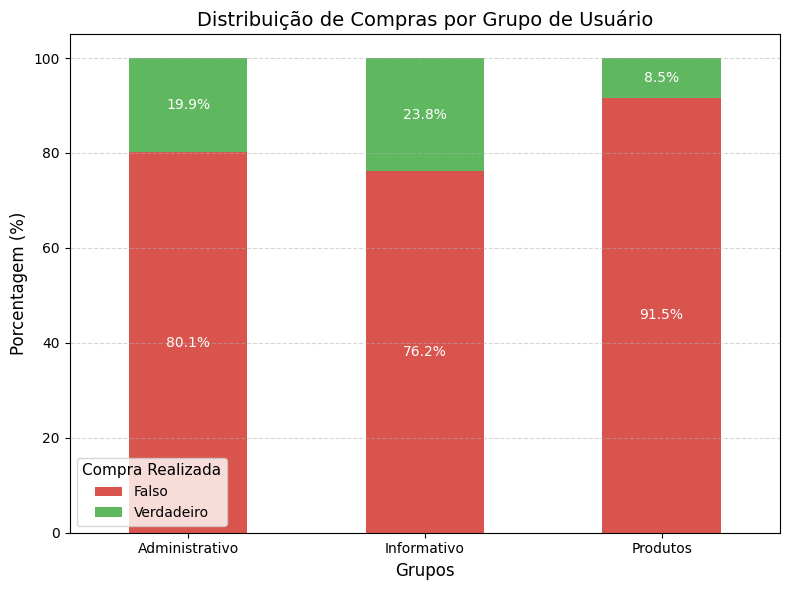

In [27]:
proporcao.rename(columns={True: 'Verdadeiro', False: 'Falso'}, inplace=True)
plt.figure(figsize=(10,6))
ax = proporcao.plot(kind='bar',
                    stacked=True,
                    color=['#D9544D', '#5FB760'],
                    figsize=(8,6),
                    edgecolor=None)

plt.title('Distribuição de Compras por Grupo de Usuário', fontsize=14)
plt.ylabel('Porcentagem (%)', fontsize=12)
plt.xlabel('Grupos', fontsize=12)
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, color='white')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Compra Realizada', title_fontsize=11, loc='lower left')
plt.tight_layout()

plt.show()

O perfil de usuário que mais comprou foi o `Informativo`, seguido do `Administrativo` e em último o grupo `Produtos`.

- Informativo: 23.8% dos acessos geraram vendas, enquanto 76.2% não.
- Administrativo: 19.9% dos acessos geraram vendas, enquanto 80.1% não.
- Produtos: 8.5% dos acessos geraram vendas, enquanto 91.5% não.

In [28]:
g = df_all[['BounceRates', 'ExitRates', 'PageValues', 'Revenue', 'Grupos']].groupby('Grupos').mean(numeric_only=True)
g['Revenue'] = round(g['Revenue']*100, 2)

In [29]:
variaveis_sum = ['Administrative', 'Informational', 'ProductRelated']

variaveis_mean = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']

agrupado = df_all.groupby('Grupos')

soma = agrupado[variaveis_sum].sum().rename(columns=lambda x: x + '_sum')
media = round(agrupado[variaveis_mean].mean(), 2).rename(columns=lambda x: x + '_mean')

resumo = pd.concat([soma, media, g], axis=1)
resumo.T

Grupos,Administrativo,Informativo,Produtos
Administrative_sum,16498.000000,11805.000000,243.000000
Informational_sum,114.000000,5998.000000,97.000000
ProductRelated_sum,148318.000000,156258.000000,86673.000000
Administrative_Duration_mean,132.780000,174.220000,0.310000
Informational_Duration_mean,0.000000,173.990000,0.060000
ProductRelated_Duration_mean,1244.190000,2537.370000,571.640000
BounceRates,0.006837,0.007630,0.040299
ExitRates,0.022587,0.022424,0.067763
PageValues,8.052558,8.287693,3.186941
Revenue,19.890000,23.800000,8.460000


#### Considerações finais:
---
##### Grupo Informativo:

-	Maior tempo médio em todas as páginas (inclusive as informativas, negligenciadas pelos outros grupos).
-	Engajamento equilibrado entre todas as áreas: administrativa, informativa e de produto.
-	Taxa de conversão média mais alta (23,8%) e maior valor médio por página (PageValues = 8,29).
-	Taxas de rejeição e saída baixas, indicando navegação precisa e objetiva.

Este grupo representa o perfil ideal de cliente: pesquisa, explora e toma decisões informadas. São os usuários que mais convertem, e com maior retorno financeiro.

---

##### Grupo Administrativo:
-	Acessa mais páginas administrativas e de produto.
-	Quase ignora conteúdo informativo.
-	Taxa de conversão média de 19,89% e PageValues de 8,05, indicando bom desempenho comercial.
-	Também possui baixas taxas de rejeição e bom tempo médio de navegação.

Usuários mais objetivos, que entram com foco claro e tomam decisões rápidas. Não são os que mais compram, mas ainda assim geram receita relevante chegando próximo ao grupo informativo.

---

##### Grupo Produtos:
-	Concentra-se exclusivamente em páginas de produto.
-	Quase não acessa áreas administrativas ou informativas.
-	Apesar do volume (86 mil acessos), possui a menor Taxa de conversão média 8,46% e PageValues mais baixos (3,18).
-	Altas taxas de rejeição e saída, sugerindo desistência ou frustração.

Usuários pouco engajados, com navegação rasa. Possivelmente representam visitantes indecisos, em busca de algo muito específico ou com baixo interesse real em comprar.

---